# Tidying and Transforming Data

In this assignment, we have been given a dataset describing arrival delays for two airlines across five destinations. The aim is to tidy this dataset and perfom analysis on the resulting dataset. We'll begin by importing the CSV file.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

filename = "https://raw.githubusercontent.com/manasiakre/DAV__5400/main/M10_Data.csv"
flights = pd.read_csv(filename)
flights

,Unnamed: 0,Unnamed: 1,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,ALASKA,on time,497.0,221.0,212.0,503.0,1841.0
1,NaN,delayed,62.0,12.0,20.0,102.0,305.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AMWEST,on time,694.0,4840.0,383.0,320.0,201.0
4,NaN,delayed,117.0,415.0,65.0,129.0,61.0


## Tidying and Reshaping the Dataset

The above data, as per Hadley Wickham's rules, is 'untidy', as there are multiple observations contained within a single row of data, and there are multiple variable values contained within columns. For example, 'Alaska' contains “on time” arrivals for five separate cities within a single row of data. There are both the count of “on time” and “delayed” flights for multiple airlines contained within a single column ('Unnamed: 1'). 

According to the tidy data guidelines, each row of data should contain a single observation, and each column should contain data values of a single variable. Following these rules, we'll now perform the clean-up.

**Step 1: Basic clean-up** - This step includes renaming all the unnamed columns (see 'Unnamed: 0' and 'Unnamed: 1') with a suitable heading ('Airlines' and 'Status' respectively). We'll also remove Row 3 that contains nothing but 'Nan' values all across the row. Finally, we'll replace 'NaN' values in the now-renamed 'Airlines' column with their respective airlines' names.

**Step 2: Transforming from 'wide' format to 'long'** - Since the given wide format is 'untidy', we'll have to convert this into a 'long' format. In the long format, each row is a one-time point per subject. So each subject (county) will have data in multiple rows (Grace-Martin, 2021). The long format will keep the Airlines and Status column intact but will add a 'City' column and its adjacent count under the column 'Frequency'. This will be done using the 'melt' function.

**Step 3: Final Clean-up** - In this step, we'll 'spread' out our long format data so that we get separate columns for 'delayed' and 'on time'. These two columns will contain the counts of airlines that were delayed and arrived on time, respectively. Additionally, we'll also create a new column called 'Total Flights' that would be the sum of the former two. Finally, we'll convert all the numerical float values to integers for easy readability.


In [2]:
# step 1

# renaming unnamed columns
flights.rename(columns={'Unnamed: 0' :'Airlines', 'Unnamed: 1' :'Status'}, inplace=True )

# adding flights names to NaN in Airlines column
flights.loc[1,'Airlines'] = 'ALASKA'
flights.loc[4,'Airlines'] = 'AMWEST'

# removing 3rd row (with no values in any columns)
flights_2 = flights.drop([2], axis = 0)

flights_2.head()

,Airlines,Status,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,ALASKA,on time,497.0,221.0,212.0,503.0,1841.0
1,ALASKA,delayed,62.0,12.0,20.0,102.0,305.0
3,AMWEST,on time,694.0,4840.0,383.0,320.0,201.0
4,AMWEST,delayed,117.0,415.0,65.0,129.0,61.0


In [3]:
# step 2

# reducing length using melt - long format
# source - https://towardsdatascience.com/whats-tidy-data-how-to-organize-messy-datasets-in-python-with-melt-and-pivotable-functions-5d52daa996c9

flights_3 = flights_2.melt(id_vars=["Airlines", "Status"],var_name=["City"],value_name="Frequency")
flights_3

,Airlines,Status,City,Frequency
0,ALASKA,on time,Los Angeles,497.0
1,ALASKA,delayed,Los Angeles,62.0
2,AMWEST,on time,Los Angeles,694.0
3,AMWEST,delayed,Los Angeles,117.0
4,ALASKA,on time,Phoenix,221.0
5,ALASKA,delayed,Phoenix,12.0
6,AMWEST,on time,Phoenix,4840.0
7,AMWEST,delayed,Phoenix,415.0
8,ALASKA,on time,San Diego,212.0
9,ALASKA,delayed,San Diego,20.0


In [45]:
# step 3 

# final clean view

# spreading out data
# https://stackoverflow.com/questions/43973999/how-to-spread-a-column-in-a-pandas-data-frame
flights_4 = flights_3.set_index(['Airlines','City','Status'])['Frequency'].unstack(fill_value=0)

# creating a new column for total number of flights
sum_column = flights_4["delayed"] + flights_4["on time"]
flights_4["Total Flights"] = sum_column

# converting floats to integers
flights_4['delayed'] = flights_4['delayed'].astype(int)
flights_4['on time'] = flights_4['on time'].astype(int)
flights_4['Total Flights'] = flights_4['Total Flights'].astype(int)

flights_4

Status                  delayed  on time  Total Flights
Airlines City                                          
ALASKA   Los Angeles         62      497            559
         Phoenix             12      221            233
         San Diego           20      212            232
         San Francisco      102      503            605
         Seattle            305     1841           2146
AMWEST   Los Angeles        117      694            811
         Phoenix            415     4840           5255
         San Diego           65      383            448
         San Francisco      129      320            449
         Seattle             61      201            262

Before we move on to analyse the final dataset, we'll add two more columns that would help us in our next steps - the delay rate and the on time rate.

In [5]:
div_column_1 = (flights_4["delayed"] / flights_4["Total Flights"])
flights_4["Delay Rate"] = div_column_1

div_column_2 = (flights_4["on time"] / flights_4["Total Flights"])
flights_4["On Time Rate"] = div_column_2

flights_4

Status                  delayed  on time  Total Flights  Delay Rate  \
Airlines City                                                         
ALASKA   Los Angeles         62      497            559    0.110912   
         Phoenix             12      221            233    0.051502   
         San Diego           20      212            232    0.086207   
         San Francisco      102      503            605    0.168595   
         Seattle            305     1841           2146    0.142125   
AMWEST   Los Angeles        117      694            811    0.144266   
         Phoenix            415     4840           5255    0.078972   
         San Diego           65      383            448    0.145089   
         San Francisco      129      320            449    0.287305   
         Seattle             61      201            262    0.232824   

Status                  On Time Rate  
Airlines City                         
ALASKA   Los Angeles        0.889088  
         Phoenix            0.948498  
         San Diego          0.913793  
         San Francisco      0.831405  
         Seattle            0.857875  
AMWEST   Los Angeles        0.855734  
         Phoenix            0.921028  
         San Diego          0.854911  
         San Francisco      0.712695  
         Seattle            0.767176

## Analysis

### 1. Which airline had the best overall on time performance?

For this, we'll compare the average 'on time' rate for each airlines against their total number of flights count. We'll begin by splitting the table into two in a way where we get two datasets - one for Alaska, and the other for AmWest.

In [6]:
# splitting the data by 'Airlines' using index location (iloc)

Alaska = flights_4.iloc[0:5]
Alaska

Status                  delayed  on time  Total Flights  Delay Rate  \
Airlines City                                                         
ALASKA   Los Angeles         62      497            559    0.110912   
         Phoenix             12      221            233    0.051502   
         San Diego           20      212            232    0.086207   
         San Francisco      102      503            605    0.168595   
         Seattle            305     1841           2146    0.142125   

Status                  On Time Rate  
Airlines City                         
ALASKA   Los Angeles        0.889088  
         Phoenix            0.948498  
         San Diego          0.913793  
         San Francisco      0.831405  
         Seattle            0.857875

In [7]:
Amwest = flights_4.iloc[5:10]
Amwest

Status                  delayed  on time  Total Flights  Delay Rate  \
Airlines City                                                         
AMWEST   Los Angeles        117      694            811    0.144266   
         Phoenix            415     4840           5255    0.078972   
         San Diego           65      383            448    0.145089   
         San Francisco      129      320            449    0.287305   
         Seattle             61      201            262    0.232824   

Status                  On Time Rate  
Airlines City                         
AMWEST   Los Angeles        0.855734  
         Phoenix            0.921028  
         San Diego          0.854911  
         San Francisco      0.712695  
         Seattle            0.767176

Now that we have our separate dataset, we can go ahead with the calculations.

In [8]:
# by airlines overall best performance
# Source - https://rpubs.com/mjgons/666653

print('sum of total flights:', Alaska['Total Flights'].sum())
print('mean of on time rate:',Alaska['On Time Rate'].mean())
print()
print('sum of total flights:', Amwest['Total Flights'].sum())
print('mean of on time rate:',Amwest['On Time Rate'].mean())

sum of total flights: 3775
mean of on time rate: 0.8881317378457076

sum of total flights: 7225
mean of on time rate: 0.8223084838449314


As we can see, the mean 'on time' rate for Alaska is **0.88**, and it has **3775** flights. AmWest has nearly double the flights **(7225)** and has an 'on time' rate of **0.82**, which is below Alaska's rate. We can say that AmWest has more delays than Alaska, but it also has more flights to handle so that could be a reason behind its delays. 

Hence, for that reason, **AmWest** is performing better overall since despite having far more flights than Alaska, it has maintained an on time rate of 0.82.

### 2. For each city, which airline had the best on time performance?

We can do this by using a simple scatter plot. First, we'll concatenate the two separate datasets we created above ('Alaska' and 'Amwest') since we want to show both on the same chart. This can be done using pd.concat().

Next, we'll plot the scatter plot.

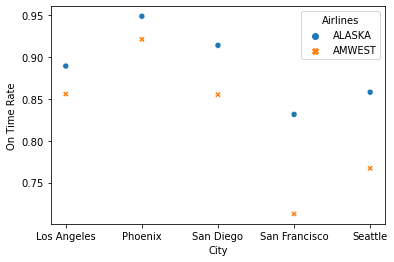

In [55]:
# Source: https://rpubs.com/Magnus_Skonberg/666016

c = pd.concat([Alaska.assign(dataset='Alaska'), Amwest.assign(dataset='Amwest')])
sns.scatterplot(x='City', y='On Time Rate', data=c, hue='Airlines', style='Airlines')
plt.show()

Both airlines have the best performance in **Phoenix** and the worst in **San Francisco.** However, in San Francisco, Alaska performs far better than AmWest, whereas in Phoenix there isn't much difference between the two. 

We can say that **Alaska** performs the best in each city.

## Would you mimic the structure of the original graphic if you were to convert the data from 'long' to 'wide' again?

Although the original format is good for visual purposes, it could be more concise. Since there are 5 cities and just 2 airlines, we can swap 'City' and 'Airlines' positions. This format is much cleaner than the original. We can do this by using 'pivot' function and defining index(row values), columns, and values(frequencies in each row).

In [57]:
wide = flights_4.pivot_table(index='City', columns='Airlines', values=['delayed', 'on time'])
wide

Status        delayed        on time       
Airlines       ALASKA AMWEST  ALASKA AMWEST
City                                       
Los Angeles        62    117     497    694
Phoenix            12    415     221   4840
San Diego          20     65     212    383
San Francisco     102    129     503    320
Seattle           305     61    1841    201


**Additional Sources:**

Grace-Martin, K. (2021). The Wide and Long Data Format for Repeated Measures Data - The Analysis Factor. Retrieved 28 March 2021, from https://www.theanalysisfactor.com/wide-and-long-data/